## Final Project Submission

Please fill out:
* Student name:Fidelis Wanalwenge, Elizabeth Nyanbura, Sophy Murithi, Khadija Omar 
* Student pace:part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Introduction

# Business Problem

A group of real estate agents are looking to expand their business into remodeling houses in addition to selling. They want to accurately predict the value of homes based on the features of the house so they can maximize profits for their remodels. In order to accomplish this, they have enlisted my help in building a model to predict the price of homes in the county. 

Objectives

1. To create a complex model using several different independent variables that can swifty and effectively achieve pricing estimates closer to realized housing prices

2. To evaluate different models that ultimately lead to selecting our best model for predicting house prices

3. To provide insight on house features that have the biggest impact on sale price


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Import standard packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data into a pandas dataframe
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Check the descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Check for duplicated values
df.duplicated().sum()

0

In [6]:
#Check for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Initial Observations

Missing Values

yr_renovated has the most missing values, followed by waterfront and view. waterfront and view are categorical, so we will replace those null values with 0s. I will assume null values in yr_renovated mean that the house has not been renovated and will replace with 0s.

Data types

The date, waterfront, view, condition, grade, sqft_basement columns are stored as type object, we will need to remove or convert to numerical data type before modeling.

# Data Cleaning

In this section, I will clean the dataset by removing irrelevant columns to my analysis and trim the dataset of null values. I will also removeoutliers and convert the remaining categorical columns containing strings into numeric datatypes.

In [7]:
#Create copy to use for visualization later
data =df.copy()


In [8]:
# Columns to be dropped
dropped_columns = ['date','view', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement','yr_renovated', 'lat', 'long', 'zipcode']

In [9]:
#dropping columns
df = df.drop(dropped_columns, axis=1)

In [10]:
#view remaining columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [12]:
#check null values
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [13]:
# Replace null values with 0
df = df.fillna(0)

In [14]:
#check if it has worked
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

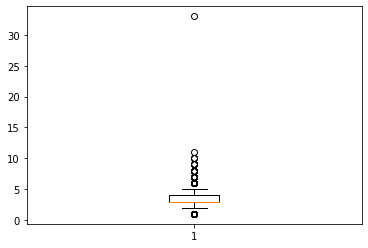

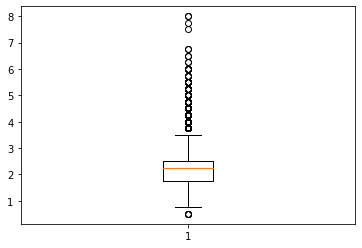

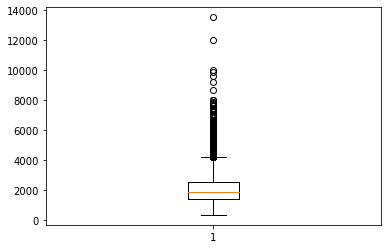

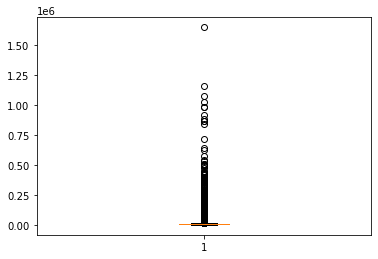

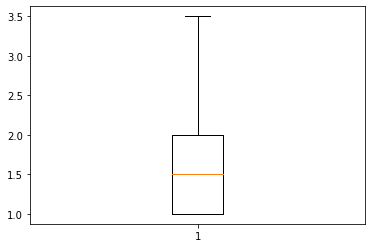

In [15]:
# Check continuous predictors for outliers using Boxplot 

outliers = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

for outlier in outliers:
    plt.figure()
    plt.boxplot(df[outlier]);

In [16]:
# Investigate outlier in the bedrooms column
df.loc[df['bedrooms'] > 15]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,NO,Very Good,7 Average,1947


In [17]:
# Remove outlier
df = df.loc[(df['bedrooms'] != 33)]
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [18]:
# Check to see if it worked
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21596 non-null  int64  
 1   price        21596 non-null  float64
 2   bedrooms     21596 non-null  int64  
 3   bathrooms    21596 non-null  float64
 4   sqft_living  21596 non-null  int64  
 5   sqft_lot     21596 non-null  int64  
 6   floors       21596 non-null  float64
 7   waterfront   21596 non-null  object 
 8   condition    21596 non-null  object 
 9   grade        21596 non-null  object 
 10  yr_built     21596 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [20]:
# Convert categorical strings to integers
# Convert categorical strings to integers
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))

condition_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4
}
df['condition'] = df['condition'].map(condition_mapping)

grade_mapping = {
    '3 Poor': 3,
    '4 Low': 4,
    '5 Fair': 5,
    '6 Low Average': 6,
    '7 Average': 7,
    '8 Good': 8,
    '9 Better': 9,
    '10 Very Good': 10,
    '11 Excellent': 11,
    '12 Luxury': 12,
    '13 Mansion': 13
}
df['grade'] = df['grade'].map(grade_mapping)

In [21]:
# Check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21596 non-null  int64  
 1   price        21596 non-null  float64
 2   bedrooms     21596 non-null  int64  
 3   bathrooms    21596 non-null  float64
 4   sqft_living  21596 non-null  int64  
 5   sqft_lot     21596 non-null  int64  
 6   floors       21596 non-null  float64
 7   waterfront   21596 non-null  int64  
 8   condition    21596 non-null  int64  
 9   grade        21596 non-null  int64  
 10  yr_built     21596 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.0 MB


In [22]:
df.waterfront.value_counts()

0    21450
1      146
Name: waterfront, dtype: int64